### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

### 1. Importing Data

In [68]:
# Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. 
# This should be the merged version of your data that contains the new customers column.
data_path = r'C:\Users\gerar\CareerFoundry Python\Instacart Basket Analysis'
df_orders_products_all = pd.read_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [69]:
# shape
df_orders_products_all.shape

(32404859, 33)

In [70]:
###  !   Lower row settings when rerunning the script  ! ### 
pd.options.display.max_rows = 80
pd.options.display.max_columns = None

In [71]:
 df_orders_products_all.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,_merge
0,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both
1,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2398795,2,3,7,15.0,1,1,Mid_range_price,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both
2,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,473747,3,3,12,21.0,1,1,Mid_range_price,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both
3,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2254736,4,4,7,29.0,1,1,Mid_range_price,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both
4,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,431534,5,4,15,28.0,1,1,Mid_range_price,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,both


In [72]:
df_orders_products_all = df_orders_products_all.drop(['_merge'], axis=1)

In [73]:
# Missed step of updating items with a prize of 99999 and 14999.They will be nan values
df_orders_products_all.loc[df_orders_products_all['prices'] >100, 'prices'] = np.nan

In [74]:
df_orders_products_all.head()

,user_id,first_name,last_name,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag
0,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2398795,2,3,7,15.0,1,1,Mid_range_price,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,473747,3,3,12,21.0,1,1,Mid_range_price,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2254736,4,4,7,29.0,1,1,Mid_range_price,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,1,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,431534,5,4,15,28.0,1,1,Mid_range_price,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


### 2. Security Implications 

We have PII in our main dataframe which contains first_name, last_name, marital_status, number_of_dependants. Ideally only by deleting the first and last name we could have a better anonimized list. 

In [75]:
# create a dataframe without PII information which should be exported
df_orders_products_all = df_orders_products_all.drop(['first_name', 'last_name'], axis=1)
df_all_no_pii = df_orders_products_all.copy()

In [76]:
df_orders_products_all.shape

(32404859, 30)

In [77]:
df_all_no_pii.shape

(32404859, 30)

In [78]:
#check
df_all_no_pii.head(1)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag
0,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [79]:
# free memory of unused tables #
del df_orders_products_all 


### 3. Regional Segmentation

In [80]:
# create lists that reflect regions. 
# region 1 = Northeast
# region 2 = Midwest
# region 3 = South
# region 4 = West 
region_1 = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]
region_2 =  ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]
region_3 = ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]
region_4 = ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]


In [81]:
# check headers
df_all_no_pii.head(1)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag
0,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


In [82]:
# use .loc to fill the flag column according to the regions
df_all_no_pii.loc[df_all_no_pii['state'].isin(region_1), 'region'] = 'Northeast'
df_all_no_pii.loc[df_all_no_pii['state'].isin(region_2), 'region'] = 'Midwest'
df_all_no_pii.loc[df_all_no_pii['state'].isin(region_3), 'region'] = 'South'
df_all_no_pii.loc[df_all_no_pii['state'].isin(region_4), 'region'] = 'West'

In [83]:
# check shape
df_all_no_pii.shape

(32404859, 31)

In [84]:
# Use a count aggregation, grouping by 2 columns( region, spending flag), count user_id 
df_regional_spending = df_all_no_pii.groupby(['region', 'spending_flag'])['user_id'].nunique().reset_index(name='number_of_customers')

In [85]:
df_regional_spending

,region,spending_flag,number_of_customers
0,Midwest,High spender,1263
1,Midwest,Low spender,47256
2,Northeast,High spender,883
3,Northeast,Low spender,35505
4,South,High spender,1817
5,South,Low spender,66920
6,West,High spender,1394
7,West,Low spender,51171


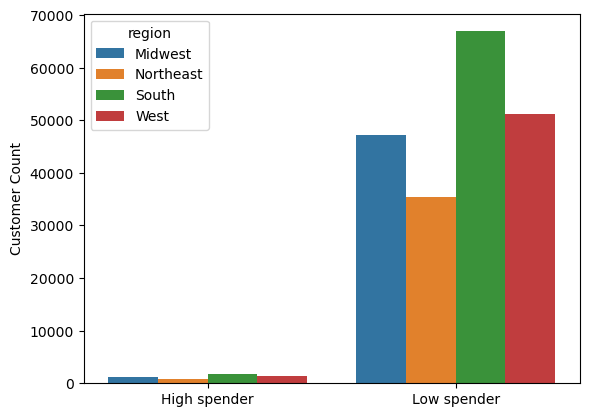

In [86]:
# Plot the regional spending dataframe as a double bar 
bar_regional_spending = sns.barplot(data = df_regional_spending, x= 'spending_flag', y='number_of_customers', hue= 'region')
bar_regional_spending.set_xlabel('')
bar_regional_spending.set_ylabel('Customer Count')
plt.show()


In [87]:
# create a dataframe only for high spenders 
df_high_spenders = df_regional_spending.loc[df_regional_spending['spending_flag'] == 'High spender']
df_high_spenders

,region,spending_flag,number_of_customers
0,Midwest,High spender,1263
2,Northeast,High spender,883
4,South,High spender,1817
6,West,High spender,1394


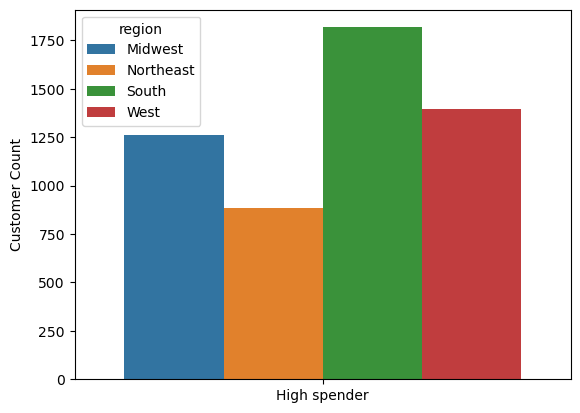

In [88]:
# Plot the high spenders only
bar_high_spender = sns.barplot(data = df_high_spenders, x= 'spending_flag', y='number_of_customers', hue= 'region')

# labels
bar_high_spender.set_xlabel('')
bar_high_spender.set_ylabel('Customer Count')
plt.show()

Thanks to the charts above we can picture 2 things:

- There are more 'Low spenders' than 'High spenders'
- In both spending groups we have the highest amount of customers in region 3, followed by regions 4, 2 and 1 respectively. 

### 4. Exclude low-activity customers

In [89]:
df_all_no_pii.head(1)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,region
0,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South


In [90]:
# use the 'max_order' column to filter customers with less than 5 orders
df_low_activity_customers = df_all_no_pii.loc[df_all_no_pii['max_order']<5]

In [91]:
# this is the custumers with less than 5 orders 
df_low_activity_customers.head(50)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,region
2403,100003,Female,Tennessee,43,3/4/2020,1,married,146298,1215,Kidz All Natural Baked Chicken Nuggets,129,1,10.7,2274956,2,6,8,1.0,3,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2404,100003,Female,Tennessee,43,3/4/2020,1,married,146298,4605,Yellow Onions,83,4,1.2,3025729,1,5,18,NaN,12,0,Low-range product,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2405,100003,Female,Tennessee,43,3/4/2020,1,married,146298,4724,Broccoli Florettes,32,4,7.8,3025729,1,5,18,NaN,21,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2406,100003,Female,Tennessee,43,3/4/2020,1,married,146298,7379,French Beans,123,4,14.2,3025729,1,5,18,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2407,100003,Female,Tennessee,43,3/4/2020,1,married,146298,7379,French Beans,123,4,14.2,239832,3,5,18,6.0,3,1,Mid_range_price,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2408,100003,Female,Tennessee,43,3/4/2020,1,married,146298,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,6.6,3025729,1,5,18,NaN,3,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2409,100003,Female,Tennessee,43,3/4/2020,1,married,146298,7781,Organic Sticks Low Moisture Part Skim Mozzarel...,21,16,6.6,239832,3,5,18,6.0,2,1,Mid_range_price,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2410,100003,Female,Tennessee,43,3/4/2020,1,married,146298,7909,Chile Con Queso,13,20,2.4,2274956,2,6,8,1.0,10,0,Low-range product,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2411,100003,Female,Tennessee,43,3/4/2020,1,married,146298,9214,Ground Chuck,122,12,22.2,3025729,1,5,18,NaN,20,0,High-range product,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South
2412,100003,Female,Tennessee,43,3/4/2020,1,married,146298,9214,Ground Chuck,122,12,22.2,239832,3,5,18,6.0,5,1,High-range product,Regularly busy,Regularly busy,Average orders,3,New customer,8.35098,Low spender,1.0,Frequent customer,South


In [92]:
# export the excluded customers dataframe
df_low_activity_customers.to_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [93]:
# this dataframe has customers with 5 or more orders

df_high_activity_customers = df_all_no_pii.loc[df_all_no_pii['max_order']>=5]

In [94]:
print(len(df_low_activity_customers))
print(len(df_high_activity_customers))
    

1440295
30964564


In [95]:
# security check if high+low == full table
len(df_high_activity_customers) + len(df_low_activity_customers) == len(df_all_no_pii)

True

In [96]:
df_high_no_pii = df_high_activity_customers.copy()

In [97]:
df_high_no_pii.head(1)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,region
0,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South


In [98]:
df_high_no_pii.shape

(30964564, 31)

In [99]:
# free up memory space
del df_low_activity_customers
del df_all_no_pii

## 5. Customer profiling

First we have to make brackets or groups for some variables: 

### Age = 'age_group'
    
    Senior
    Middle Age
    Adult
    Young adult
    
### Income = 'income_group'  
    Below average
    Average
    Above Average

### Dependants 

    Single & Divorced/widowed all have 0 dependants. I took the liberty of assuming they are not parents but this might have to do with the collection of data.
    Only married people have more than 0 dependants. I assumed that 1 dependant means their partner. More than one hints a kid.
    I didnt consider the scenario of a married couple assigning a parent as their dependant. This is a limitation.

In [100]:
df_high_no_pii.head(1)

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,region
0,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South


In [101]:
# Age groups
# establish a column for age groups in the main database
# 60+ Senior
# (40-59) Middle Age
# (30-39) Adult
# (18-29) Young Adult
df_high_no_pii.loc[df_high_no_pii['age']>= 60, 'age_group'] = 'Senior'
df_high_no_pii.loc[(df_high_no_pii['age']>= 40) & (df_high_no_pii['age']<60) , 'age_group'] = 'Middle age'
df_high_no_pii.loc[(df_high_no_pii['age']>= 30) & (df_high_no_pii['age']<40) , 'age_group'] = 'Adult'
df_high_no_pii.loc[(df_high_no_pii['age']>= 18) & (df_high_no_pii['age']<30) , 'age_group'] = 'Young adult' 


In [102]:
# Income group 
# Create descriptive statistics of income

df_high_no_pii['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

In [103]:
# Income groups
# Low Income: 25,903 to 67,292
# Average Income: 67,292 to 128,102
# High Income: 128,102 to 593,901
    
df_high_no_pii.loc[df_high_no_pii['income']>= 128102, 'income_group'] = 'High income'
df_high_no_pii.loc[(df_high_no_pii['income']>= 67292) & (df_high_no_pii['income']<128102) , 'income_group'] = 'Average income'
df_high_no_pii.loc[(df_high_no_pii['income']>= 25903) & (df_high_no_pii['income']<67292) , 'income_group'] = 'Low income'

In [104]:
# Customer profiling 
# Number of dependants >1 + Married + young adult/adult  = Active Parent
# Number of dependants == 1 + Married = Family of two (no kids)
# Low spender + low income  = Budget Shopper
# High Income/average income + Young adult + single = Young Professional
# Average/high income + middle age or senior =  Affluent Adult 
# No profile = NaN value

df_high_no_pii.loc[(df_high_no_pii['number_of_dependants']>1) & (df_high_no_pii['marital_status']== 'married') & ((df_high_no_pii['age_group']=='Adult') | (df_high_no_pii['age_group']=='Young adult')), 'customer_profile'] = 'Active Parent'
df_high_no_pii.loc[(df_high_no_pii['number_of_dependants'] == 1) & (df_high_no_pii['marital_status'] == 'married'), 'customer_profile'] = 'Family without kids'
df_high_no_pii.loc[(df_high_no_pii['spending_flag']=='Low spender')& (df_high_no_pii['income_group']=='Low income'), 'customer_profile'] = 'Budget shopper'
df_high_no_pii.loc[((df_high_no_pii['income_group'] == 'High income') | (df_high_no_pii['income_group'] == 'Average income')) & ((df_high_no_pii['age_group']=='Young adult') | (df_high_no_pii['age_group'] == 'Adult')) & (df_high_no_pii['marital_status']=='single'), 'customer_profile'] = 'Young professional'
df_high_no_pii.loc[((df_high_no_pii['income_group'] == 'High income') | (df_high_no_pii['income_group'] == 'Average income')) &((df_high_no_pii['age_group'] == 'Middle age') | (df_high_no_pii['age_group'] == 'Senior')), 'customer_profile'] = 'Affluent mature'
df_high_no_pii.loc[df_high_no_pii['customer_profile'].isna(), 'customer_profile'] = 'No profile'

# Playground (I used this part to test the customer modelling)


In [105]:
# have a dataframe with no duplicates. Unique customers. 
df_unique_user_id = df_high_no_pii.drop_duplicates(subset=['user_id'])

In [106]:
df_unique_user_id.groupby(['customer_profile','age_group', 'marital_status', 'number_of_dependants'])['user_id'].nunique().reset_index(name='number_of_customers')

,customer_profile,age_group,marital_status,number_of_dependants,number_of_customers
0,Active Parent,Adult,married,2,3213
1,Active Parent,Adult,married,3,3193
2,Active Parent,Young adult,married,2,2587
3,Active Parent,Young adult,married,3,2499
4,Affluent mature,Middle age,married,1,10367
5,Affluent mature,Middle age,married,2,10073
6,Affluent mature,Middle age,married,3,10197
7,Affluent mature,Middle age,single,0,10266
8,Affluent mature,Senior,divorced/widowed,0,11312
9,Affluent mature,Senior,married,1,11357


#### Through trial and error I tried to think of logical profiles that would encompass several characteristics. Trying to reduce as much as possible the number of "no profiles"



In [107]:
# visualizations that helped me understand better the demographics of the customer base. This is obsolete but stays for reference
# df_experimenting_playground = df_unique_user_id.groupby(['age_group', 'income_group'])['user_id'].nunique().reset_index(name='number_of_customers')
# sns.barplot(data = df_experimenting_playground, x= 'income_group', y='number_of_customers', hue= 'age_group') 

### 5.2 Using department_id to create a profile

In [108]:
# Customer profile: Pet owner.
# This customer buys articles from the  '8': {'department_id': 'pets'}
# The first step is to attribute this id to customers in the main dataframe
# The "query" only orders with department_id = 8. Get a list of user_ids.
# Make that list of user_ids unique
# With .loc the column df_high_no_pii['Pets']
df_high_no_pii.loc[df_high_no_pii['department_id']== 8, 'Pet_status'] = 'Pet owner'

In [109]:
# Make a list of those user ids 
pet_owner_ids = df_high_no_pii.loc[df_high_no_pii['Pet_status']=='Pet owner']
pet_owner_ids = pet_owner_ids['user_id']
pet_owner_ids

2496        100005
2497        100005
2498        100005
5722        100027
6453        100033
             ...  
32397628     99956
32397664     99956
32403068     99986
32403088     99986
32403089     99986
Name: user_id, Length: 93060, dtype: object

In [110]:
# Update the main dataframe with those user ids being a pet owner.
df_high_no_pii.loc[df_high_no_pii['user_id'].isin(pet_owner_ids), 'Pet_status'] = 'Pet owner'
df_high_no_pii.loc[df_high_no_pii['Pet_status']!= 'Pet owner', 'Pet_status'] = 'No pets'

In [111]:
df_high_no_pii['Pet_status'].value_counts()

Pet_status
No pets      27513213
Pet owner     3451351
Name: count, dtype: int64

In [112]:
# update the unique id slice
# have a dataframe with no duplicates. Unique customers. 
# show the share of customers that have pets and how many dont have

df_unique_user_id = df_high_no_pii.drop_duplicates(subset=['user_id'])
df_unique_user_id['Pet_status'].value_counts()

Pet_status
No pets      149456
Pet owner     13175
Name: count, dtype: int64

### 6. Distribution of profiles

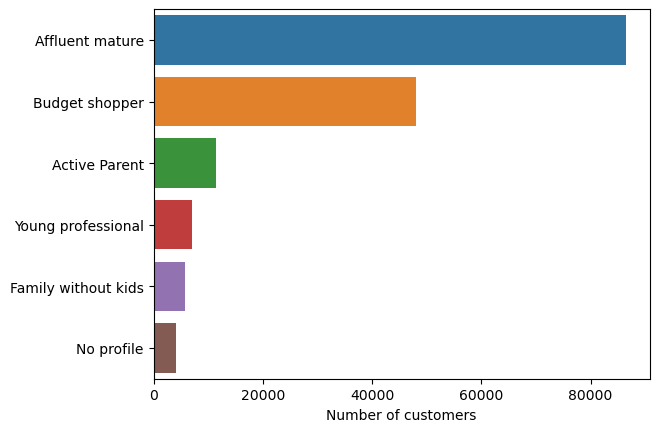

In [127]:
# create a dataframe where the customer profiles are aggregated 
# sort the values
# plot

df_customer_profile = df_unique_user_id.groupby(['customer_profile'])['user_id'].nunique().reset_index(name='number_of_customers')

df_customer_profile = df_customer_profile.sort_values(by='number_of_customers', ascending=False)

bar_customer_profiles = sns.barplot(data = df_customer_profile, y= 'customer_profile', x='number_of_customers') 

# labels
bar_customer_profiles.set_xlabel('Number of customers')
bar_customer_profiles.set_ylabel('')

plt.show()

In [159]:
total_customers_value = df_customer_profile['number_of_customers'].sum()
df_customer_profile['percentage_of_total'] = (df_customer_profile['number_of_customers']/total_customers_value*100).round(2)
df_customer_profile

,customer_profile,number_of_customers,percentage_of_total
1,Affluent mature,86478,53.17
2,Budget shopper,47959,29.49
0,Active Parent,11492,7.07
5,Young professional,6939,4.27
3,Family without kids,5715,3.51
4,No profile,4048,2.49


### 7. Max mean and min from customer profiles for usage frequency and expenditure

In [114]:
df_high_no_pii.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,aisle_id,department_id,prices,order_id,customer_order_count,order_day_of_the_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days_new,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_prior_days,frequency_flag,region,age_group,income_group,customer_profile,Pet_status
0,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2539329,1,2,8,NaN,1,0,Mid_range_price,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,Adult,Low income,Budget shopper,No pets
1,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2398795,2,3,7,15.0,1,1,Mid_range_price,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,Adult,Low income,Budget shopper,No pets
2,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,473747,3,3,12,21.0,1,1,Mid_range_price,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,Adult,Low income,Budget shopper,No pets
3,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,2254736,4,4,7,29.0,1,1,Mid_range_price,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,Adult,Low income,Budget shopper,No pets
4,1,Female,Alabama,31,2/17/2019,3,married,40423,196,Soda,77,7,9.0,431534,5,4,15,28.0,1,1,Mid_range_price,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,South,Adult,Low income,Budget shopper,No pets


In [115]:
# For the budget shopper. 
# Max, mean and min for (customer order count)
df_high_no_pii.groupby('customer_profile').agg({'customer_order_count'  : ['mean', 'min', 'max']})

customer_order_count        
                                    mean min max
customer_profile                                
Active Parent                  17.904918   1  99
Affluent mature                17.937410   1  99
Budget shopper                 17.479395   1  99
Family without kids            17.987884   1  99
No profile                     18.544384   1  99
Young professional             17.835212   1  99

In [116]:
# For the budget shopper. 
# Max, mean and min for expenditure
df_high_no_pii.groupby('customer_profile').agg({'prices'  : ['mean', 'min', 'max']})

prices           
                         mean  min   max
customer_profile                        
Active Parent        7.949225  1.0  25.0
Affluent mature      7.955793  1.0  25.0
Budget shopper       7.293823  1.0  25.0
Family without kids  7.960177  1.0  25.0
No profile           7.986376  1.0  25.0
Young professional   7.942190  1.0  25.0

### 8. Link between customer profiles and regions

In [117]:
df_regions_profiles_link = df_high_no_pii.groupby(['customer_profile','region'])['user_id'].nunique().reset_index(name='number_of_customers')

In [118]:
df_regions_profiles_link = df_regions_profiles_link.sort_values(by='number_of_customers', ascending=False)

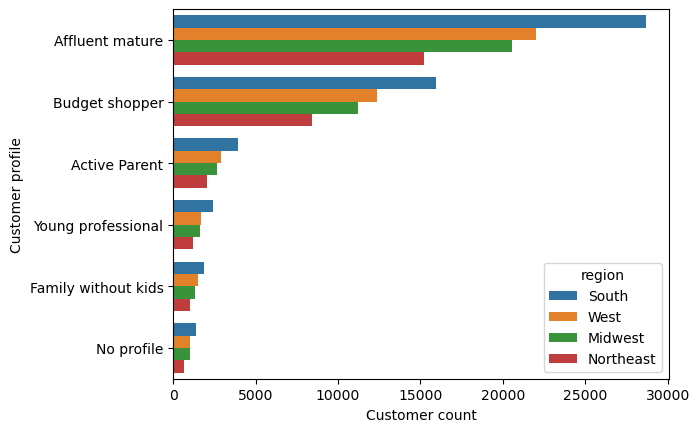

In [119]:
bar_customers_regions = sns.barplot(data = df_regions_profiles_link, x = 'number_of_customers', y = 'customer_profile', hue = 'region') 

# labels
bar_customers_regions.set_xlabel('Customer count')
bar_customers_regions.set_ylabel('Customer profile')
#plt.legend().remove()
plt.show()


It seems that every single customer profile behaves the same way regardless of region.

### 9. Charts

### Department popularity

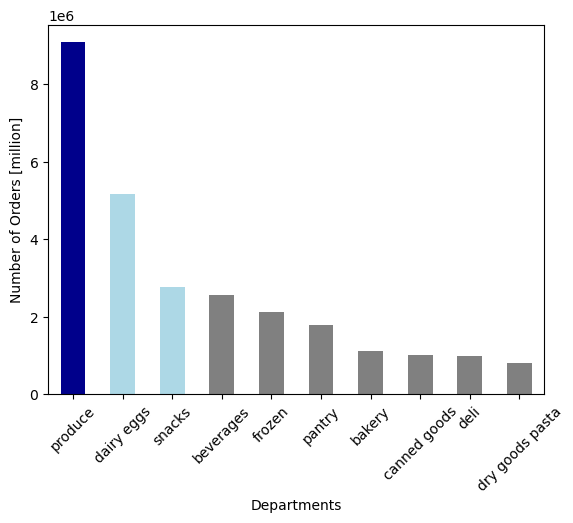

In [120]:
# import department dataset to get the names of the top 10 departments
department_list = pd.read_csv(os.path.join(data_path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)
department_list.columns = ['department_id', 'department']
department_list

# create a dataframe for the counts 
series_departments = df_high_no_pii['department_id'].value_counts()
df_departments_counts = series_departments.reset_index()
df_departments_counts.columns = ['department_id', 'count']
df_departments_counts

# merge datasets 
df_department_count_merge = df_departments_counts.merge( department_list, on = ['department_id'], indicator = False )
df_department_count_merge
top10_departments = df_department_count_merge.head(10)
top10_departments_labels = top10_departments['department'].tolist()

# plot
top10_departments_bar =top10_departments.plot.bar(x='department_id', y='count', color=['darkblue', 'lightblue', 'lightblue', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])

# x axis tick labels
top10_departments_bar.set_xticklabels(['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta'], rotation = 45)

# labels
top10_departments_bar.set_xlabel('Departments')
top10_departments_bar.set_ylabel('Number of Orders [million]')

plt.legend().remove()
plt.show()




In [145]:
total_entries = df_department_count_merge['count'].sum()

In [153]:
df_department_count_merge['share'] = ((df_department_count_merge['count']/total_entries)*100).round(2)
print('These are the percentages of items sold by each department\n')
print(df_department_count_merge[['department', 'share']])

These are the percentages of items sold by each department

         department  share
0           produce  29.32
1        dairy eggs  16.72
2            snacks   8.93
3         beverages   8.31
4            frozen   6.85
5            pantry   5.76
6            bakery   3.62
7      canned goods   3.27
8              deli   3.24
9   dry goods pasta   2.66
10        household   2.26
11     meat seafood   2.18
12        breakfast   2.17
13    personal care   1.37
14           babies   1.33
15    international   0.83
16          alcohol   0.47
17             pets   0.30
18          missing   0.21
19            other   0.11
20             bulk   0.11


### Distribution of products regarding price category

Text(0, 0.5, 'Products sold [10 millions]')

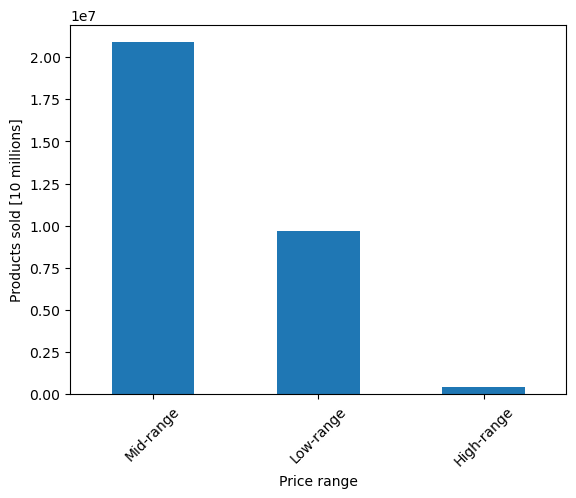

In [122]:
df_products_sold = df_high_no_pii[['product_id', 'product_name', 'price_range_loc']]
df_products_sold.columns =['product_id', 'product_name', 'price_range']
product_price_bar = df_products_sold['price_range'].value_counts().plot.bar()

# x axis tick labels
product_price_bar.set_xticklabels(['Mid-range', 'Low-range', 'High-range'], rotation = 45)

# labels
product_price_bar.set_xlabel('Price range')
product_price_bar.set_ylabel('Products sold [10 millions]')

In [142]:
print('Price range percentages:')
print((df_high_no_pii['price_range_loc'].value_counts()/len(df_high_no_pii)*100).round(2))

Price range percentages:
price_range_loc
Mid_range_price       67.47
Low-range product     31.24
High-range product     1.29
Name: count, dtype: float64


### Frequency distribution

<function matplotlib.pyplot.show(close=None, block=None)>

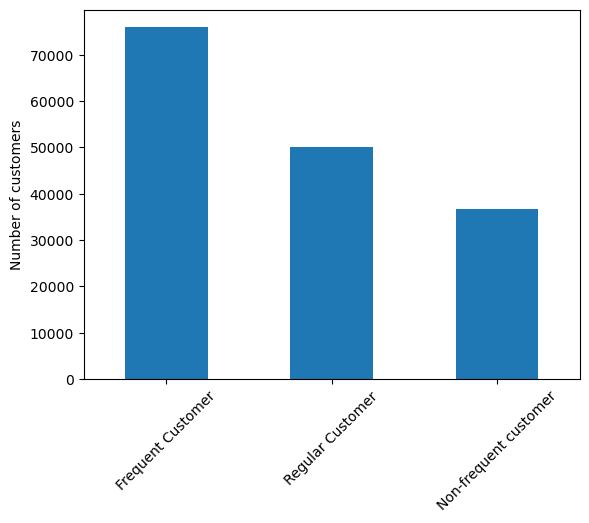

In [163]:
df_unique_user_id = df_high_no_pii.drop_duplicates(subset=['user_id'])
bar_customer_frequency = df_unique_user_id['frequency_flag'].value_counts().plot.bar()
bar_customer_frequency.set_xticklabels(['Frequent Customer', 'Regular Customer', 'Non-frequent customer'], rotation = 45)

bar_customer_frequency.set_ylabel('Number of customers')
bar_customer_frequency.set_xlabel('')
plt.show

In [170]:
print(df_unique_user_id['frequency_flag'].value_counts())
print("\n")
print((df_unique_user_id['frequency_flag'].value_counts()/len(df_unique_user_id)*100).round(2))

frequency_flag
Frequent customer        75927
Regular customer         50039
Non-frequent customer    36665
Name: count, dtype: int64


frequency_flag
Frequent customer        46.69
Regular customer         30.77
Non-frequent customer    22.54
Name: count, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

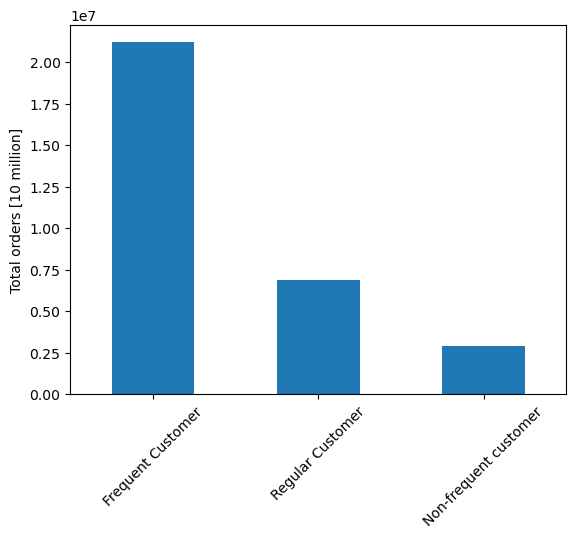

In [125]:
bar_customer_frequency_orders = df_high_no_pii['frequency_flag'].value_counts().plot.bar()
bar_customer_frequency_orders.set_xticklabels(['Frequent Customer', 'Regular Customer', 'Non-frequent customer'], rotation = 45)
bar_customer_frequency_orders.set_ylabel('Total orders [10 million]')
bar_customer_frequency_orders.set_xlabel('')
plt.show

In [171]:
print(df_high_no_pii['frequency_flag'].value_counts())
print("\n")
print((df_high_no_pii['frequency_flag'].value_counts()/len(df_high_no_pii)*100).round(2))

frequency_flag
Frequent customer        21204476
Regular customer          6865113
Non-frequent customer     2894975
Name: count, dtype: int64


frequency_flag
Frequent customer        68.48
Regular customer         22.17
Non-frequent customer     9.35
Name: count, dtype: float64


### 10. Exporting Data

In [165]:
# Export all charts 
bar_customers_regions.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_customer_region.png'), bbox_inches='tight', 
    pad_inches=0.1)
bar_customer_profiles.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_customer_profiles.png'), bbox_inches='tight', 
    pad_inches=0.1)
bar_high_spender.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_high_spender.png'), bbox_inches='tight', 
    pad_inches=0.1)
bar_regional_spending.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_regional_spending.png'), bbox_inches='tight', 
    pad_inches=0.1)
top10_departments_bar.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_popular_departments.png'), bbox_inches='tight', 
    pad_inches=0.1)
bar_customer_frequency_orders.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_bar_customer_frequency_orders.png'), bbox_inches='tight', 
    pad_inches=0.1)
bar_customer_frequency.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_customer_frequency.png'), bbox_inches='tight', 
    pad_inches=0.1)
product_price_bar.figure.savefig(os.path.join(data_path, '04 Analysis', 'Visualizations', 'task_410_bar_product_prices.png'),bbox_inches='tight', 
    pad_inches=0.1)

In [61]:
# Export Final Dataframes 

# This is the main dataframe 
df_high_no_pii.to_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'final_dataframe_full.pkl'))
# This is a slice of the main dataframe which contains the same columns but only unique user ids 
df_unique_user_id.to_pickle(os.path.join(data_path, '02 Data', 'Prepared Data', 'final_dataframe_unique_users.pkl'))